# Challenge 1

In this lab you will partner with another student to conduct **[pair programming](https://en.wikipedia.org/wiki/Pair_programming)**. In the next 60 minutes there will be 2 coding sessions of 30 minutes each. In each sessoin, one student will be the **driver** to write the code to solve the problem while the other student will be the **observer** to watch and review. There will be several iterations of your code because the observer will help the driver review the codes and make improvements until the 15 minute session ends. After the coding session ends, the driver and observer will switch roles.

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [2]:
fitbit = pd.read_csv('data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**

Hints:
- Use `Months_encoded` column
- Use `pd` method `.groupby` to obtain your plottable data
- Use `pd` method `.plot`

In [3]:
#Cálculo de la media
Media_steps = pd.Series(fitbit.groupby("Months_encoded")["Steps"].mean())
Media_steps

Months_encoded
1      9892.064516
2      8922.866667
3     10312.935484
4     13079.033333
5     10620.096774
6     12536.166667
7      9193.322581
8     11584.774194
9      9191.333333
10     8272.451613
11     9467.466667
12     8470.064516
Name: Steps, dtype: float64

In [4]:
#Cálculo de la mediana
Median_steps = pd.Series(fitbit.groupby("Months_encoded")["Steps"].median())
Median_steps

Months_encoded
1     10366.0
2      9235.0
3     11122.0
4     13846.5
5     11998.0
6     12935.5
7     10644.0
8     12213.0
9      9343.0
10     7865.0
11     9453.5
12     8531.0
Name: Steps, dtype: float64

In [5]:
#Comparamos la media la y la mediana, para comprobar la semejanza entre ambos datos:
pregunta1 = pd.concat([Media_steps, Median_steps], axis = 1)
lst = ["Media", "Median"]
pregunta1.columns = lst
pregunta1

,Media,Median
Months_encoded,,
1,9892.064516,10366.0
2,8922.866667,9235.0
3,10312.935484,11122.0
4,13079.033333,13846.5
5,10620.096774,11998.0
6,12536.166667,12935.5
7,9193.322581,10644.0
8,11584.774194,12213.0
9,9191.333333,9343.0


<AxesSubplot:xlabel='Months_encoded'>

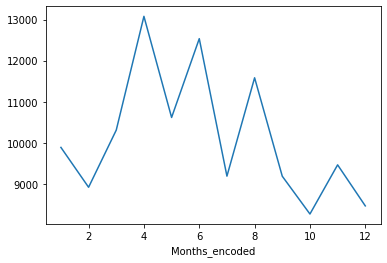

In [6]:
#Representación de la media
Media_steps.plot()

<AxesSubplot:xlabel='Months_encoded'>

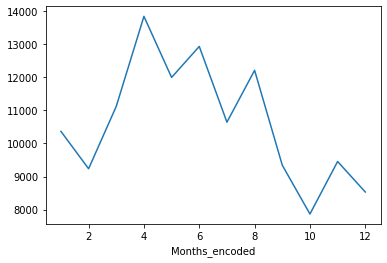

In [7]:
#Representación de la mediana
Median_steps.plot()

2. **How the sleeping efficiency distributes. Use the appropriate visualization to show the sleeping efficiency by month?**

Excluding days when `Yesterday_sleep` is 0, we would like to understand:
 - How the sleeping efficiency distributes. Plot a distribution, plus a vertical line with the mean.
 - How the sleeping efficiency distributes on Weekdays vs Workdays. Plot both distributions toguether.

Hints:
- Use `Yesterday_sleep_efficiency` column, among others.
- Use `sns` function `.hist` to plot your continuous data.
- Use `plt` function `.axvline` to plot the mean.
- Use `hue` parameter to distinguish between Workday and Weekend.
- Save your figures.

In [8]:
#Creamos la variable para quitar los 0 de yesterday_sleep 
Ys = fitbit[fitbit["Yesterday_sleep"]> 0]
print(Ys)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
1,2015-05-09,3631,18925,14.11,4,611.0,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.0,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.0,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.0,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.0,172,34,18,1094,...,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.0,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.0,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.0,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.0,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


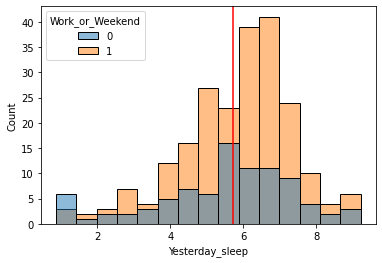

In [12]:
#Representación del gráfico con yesterday_sleep
plot = sns.histplot(x=Ys.Yesterday_sleep, hue=Ys.Work_or_Weekend)
plot.axvline(x = Ys.Yesterday_sleep.mean(),c ="red")

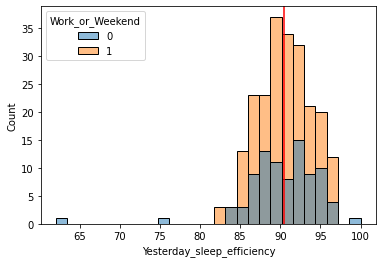

In [14]:
#Representación del gráfico con yesterday_sleep_efficiency
plot = sns.histplot(x=Ys.Yesterday_sleep_efficiency, hue=Ys.Work_or_Weekend)
plot.axvline(x = Ys.Yesterday_sleep_efficiency.mean(),c ="red")

## Coding Session II - 30 minutes

**Draw 4 scatter plots (2 rows and 2 columns) of the following features. Include some interesting legend and some interesting text**.

 - `Minutes Lightly Active`  vs `Steps`
 - `Minutes Very Active` vs `Steps`
 - `Minutes Sedentary` vs `Steps`
 - `Minutes Sedentary` vs `Minutes Very Active`
 
Hints:
 - Use `plt.subplots`
 - Use `ax.annotate`
 - Use `ax.legend` and `label` parameter

<AxesSubplot:xlabel='Minutes Sedentary', ylabel='Minutes Lightly Active'>

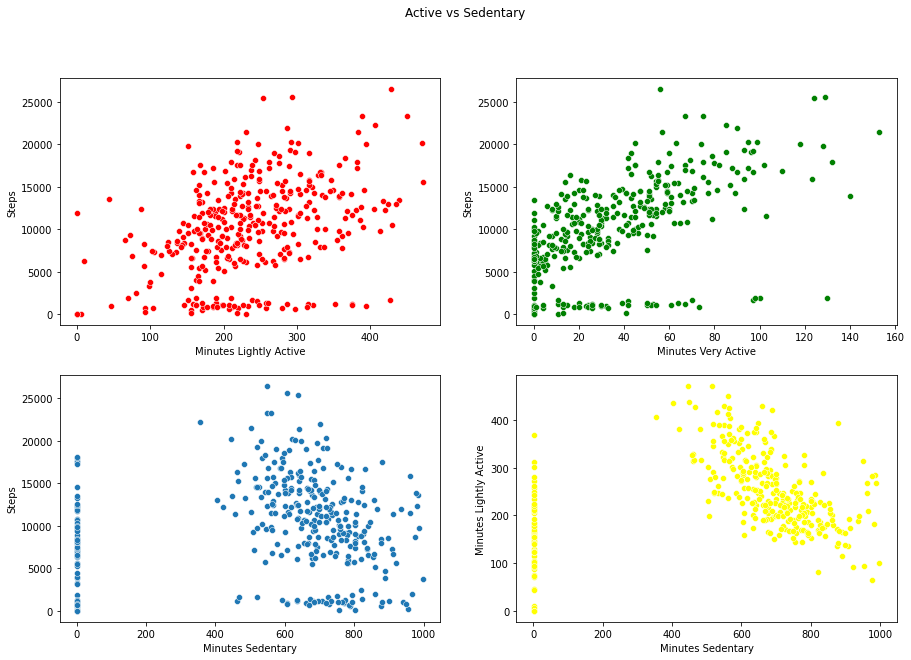

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle("Active vs Sedentary")
sns.scatterplot(x = "Minutes Lightly Active", y = "Steps", data = fitbit, ax = axs[0,0], color = "Red")
sns.scatterplot(x = "Minutes Very Active", y = "Steps", data = fitbit, ax = axs[0,1], color = "Green")
sns.scatterplot(x = "Minutes Sedentary", y = "Steps", data = fitbit, ax = axs[1,0])
sns.scatterplot(x = "Minutes Sedentary", y = "Minutes Lightly Active", data = fitbit, ax = axs[1,1], color = "Yellow")